# Install and import library

In [ ]:
!pip install torchbnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install u8darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 694.0/694.0 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 93.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 22.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.6/273.6 kB 35.1 MB/s eta 0:00:00
 

In [ ]:
!pip install hmmlearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 17.5 MB/s eta 0:00:00


In [ ]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from datetime import datetime

In [ ]:
from sklearn.preprocessing import MinMaxScaler, normalize
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score, mean_absolute_percentage_error
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score

In [ ]:
from hmmlearn.hmm import GaussianHMM

In [ ]:
# Chart drawing
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

# Evaluation function:

In [ ]:
def evaluation(y_test, y_pred):
  print(f'MSE = {mean_squared_error(y_test, y_pred)}')
  print(f'RMSE = {math.sqrt(mean_squared_error(y_test, y_pred))}')
  print(f'MAE = {mean_absolute_error(y_test, y_pred)}')
  print(f'R2_Score = {r2_score(y_test, y_pred)}')
  print(f'MAPE = {mean_absolute_percentage_error(y_test, y_pred)}')

# Preprocessing Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/IS403.N22.HTCL/final project/DATASET/Gold_Price_2.csv')

In [ ]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [ ]:
list_reference_date = [datetime.strptime(date_str, '%m/%d/%Y') for date_str in df['Date']]

In [ ]:
reference_date = min(list_reference_date)
from datetime import datetime
df['numerical_date'] = df['Date'].apply(lambda x: (datetime.strptime(x, '%m/%d/%Y') - reference_date).days)

In [ ]:
df_ = df['GLD'].values.reshape(-1, 1)

In [ ]:
scaler = MinMaxScaler()
df['GLD_'] = scaler.fit_transform(df_)
df1= df['GLD_'].copy()

In [ ]:
df1

0       0.129680
1       0.135876
2       0.132036
3       0.128894
4       0.146435
          ...   
2285    0.476394
2286    0.474125
2287    0.481543
2288    0.475521
2289    0.458537
Name: GLD_, Length: 2290, dtype: float64

In [ ]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step)]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step])
	return np.array(dataX), np.array(dataY)

# Split train, valid, test

In [ ]:
def split_data(train_ratio, test_ratio):
  train_size = int(train_ratio * len(df1))
  test_size = int(test_ratio * len(df1))
  val_size = len(df1) - train_size - test_size

  train_data = df1[:train_size]
  test_data = df1[train_size:train_size+test_size].reset_index(drop=True)
  val_data = df1[train_size+test_size:].reset_index(drop=True)
  return train_size, test_size, val_size, train_data, test_data, val_data

# GRU - tf

## Visualize GRU

In [ ]:
def visualize(y_pred_test, y_pred_val):
  plt.figure(figsize=(10, 6))

  train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
  plt.plot(scaler.inverse_transform(np.array(train_data).reshape(-1,1)))
  test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
  plt.plot(test_data_index,scaler.inverse_transform(np.array(test_data).reshape(-1,1)))
  test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
  plt.plot(test_data_index,scaler.inverse_transform(y_pred_test))
  val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
  plt.plot(val_data_index,scaler.inverse_transform(np.array(val_data).reshape(-1,1)))
  val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
  plt.plot(val_data_index, scaler.inverse_transform(y_pred_val))
  plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
  plt.show()

## Split data 8:1:1

In [ ]:
train_size, test_size, val_size, train_data, test_data, val_data = split_data(0.8, 0.1)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
X_train_gru = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test_gru = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val_gru = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [ ]:
time_step = 100

In [ ]:
model = Sequential()
model.add(GRU(64,return_sequences=True,input_shape=(time_step, 1)))
model.add(GRU(64))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 100, 64)           12864     
                                                                 
 gru_1 (GRU)                 (None, 64)                24960     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 37,889
Trainable params: 37,889
Non-trainable params: 0
_________________________________________________________________


In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train_gru, y_train, validation_data = (X_val_gru, y_val), epochs = 300, batch_size = 64, verbose = 1, callbacks=[callback])

Epoch 1/300
28/28 [==============================] - 11s 189ms/step - loss: 0.0503 - val_loss: 0.0028
Epoch 2/300
28/28 [==============================] - 4s 127ms/step - loss: 0.0030 - val_loss: 1.7677e-04
Epoch 3/300
28/28 [==============================] - 4s 132ms/step - loss: 5.9459e-04 - val_loss: 8.4869e-05
Epoch 4/300
28/28 [==============================] - 6s 214ms/step - loss: 3.8690e-04 - val_loss: 8.5460e-05
Epoch 5/300
28/28 [==============================] - 4s 127ms/step - loss: 3.7468e-04 - val_loss: 9.5476e-05
Epoch 6/300
28/28 [==============================] - 4s 130ms/step - loss: 3.6689e-04 - val_loss: 8.3549e-05
Epoch 7/300
28/28 [==============================] - 4s 152ms/step - loss: 3.5185e-04 - val_loss: 7.4592e-05
Epoch 8/300
28/28 [==============================] - 5s 192ms/step - loss: 3.3784e-04 - val_loss: 7.3409e-05
Epoch 9/300
28/28 [==============================] - 4s 131ms/step - loss: 3.2770e-04 - val_loss: 7.3180e-05
Epoch 10/300
28/28 [==========

In [ ]:
y_pred_gru_test = model.predict(X_test_gru)
y_pred_gru_val = model.predict(X_val_gru)

4/4 [==============================] - 0s 48ms/step


In [ ]:
evaluation(scaler.inverse_transform(y_test.reshape(-1,1)), scaler.inverse_transform(y_pred_gru_test))

MSE = 1.482660388887965
RMSE = 1.2176454282294025
MAE = 0.9672451561050412
R2_Score = 0.9147331543517696
MAPE = 0.008317657244502627


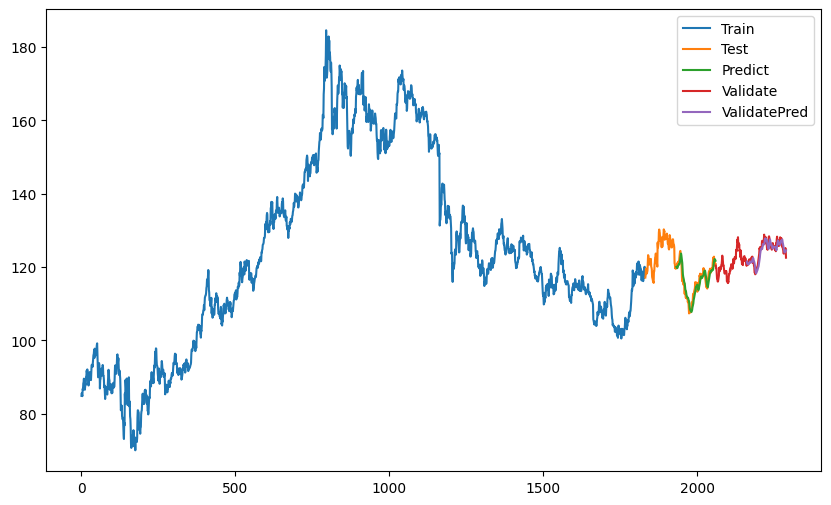

In [ ]:
visualize(y_pred_gru_test, y_pred_gru_val)

## Split data 7:2:1

In [ ]:
train_size, test_size, val_size, train_data, test_data, val_data = split_data(0.7, 0.2)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
X_train_gru = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test_gru = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val_gru = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [ ]:
model = Sequential()
model.add(GRU(64,return_sequences=True,input_shape=(time_step, 1)))
model.add(GRU(64))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train_gru, y_train, validation_data = (X_val_gru, y_val), epochs = 300, batch_size = 64, verbose = 1, callbacks=[callback])

Epoch 1/300
24/24 [==============================] - 8s 161ms/step - loss: 0.0412 - val_loss: 0.0024
Epoch 2/300
24/24 [==============================] - 4s 186ms/step - loss: 0.0033 - val_loss: 1.2689e-04
Epoch 3/300
24/24 [==============================] - 4s 180ms/step - loss: 7.3251e-04 - val_loss: 1.0262e-04
Epoch 4/300
24/24 [==============================] - 3s 130ms/step - loss: 4.9001e-04 - val_loss: 9.5067e-05
Epoch 5/300
24/24 [==============================] - 3s 131ms/step - loss: 4.6046e-04 - val_loss: 1.0211e-04
Epoch 6/300
24/24 [==============================] - 4s 155ms/step - loss: 4.4681e-04 - val_loss: 8.8371e-05
Epoch 7/300
24/24 [==============================] - 5s 217ms/step - loss: 4.3492e-04 - val_loss: 8.7559e-05
Epoch 8/300
24/24 [==============================] - 3s 135ms/step - loss: 4.2546e-04 - val_loss: 8.4417e-05
Epoch 9/300
24/24 [==============================] - 3s 132ms/step - loss: 4.0492e-04 - val_loss: 8.3422e-05
Epoch 10/300
24/24 [===========

In [ ]:
y_pred_gru_test = model.predict(X_test_gru)
y_pred_gru_val = model.predict(X_val_gru)

4/4 [==============================] - 0s 42ms/step


In [ ]:
evaluation(scaler.inverse_transform(y_test.reshape(-1,1)), scaler.inverse_transform(y_pred_gru_test))

MSE = 2.507886218866413
RMSE = 1.5836307078566054
MAE = 1.2567533876953125
R2_Score = 0.9572137794637728
MAPE = 0.010806726777951954


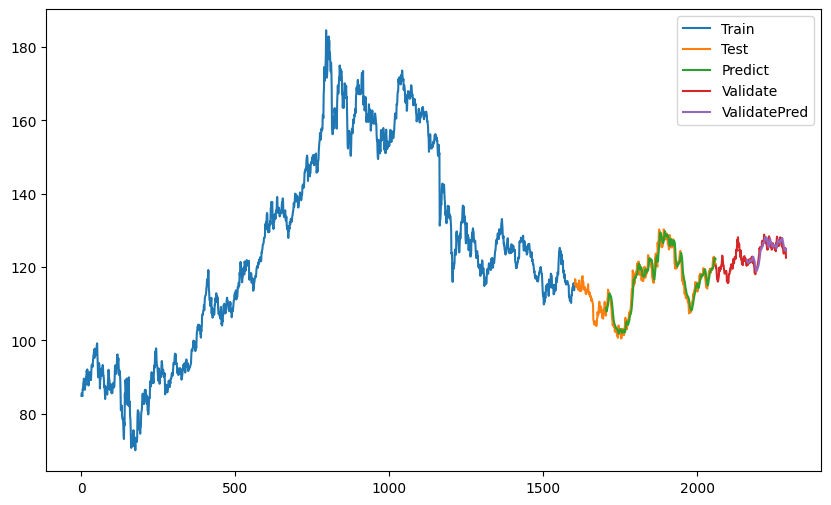

In [ ]:
visualize(y_pred_gru_test, y_pred_gru_val)

## Split data 6:3:1

In [ ]:
train_size, test_size, val_size, train_data, test_data, val_data = split_data(0.6, 0.3)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
X_train_gru = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test_gru = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val_gru = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [ ]:
model = Sequential()
model.add(GRU(64,return_sequences=True,input_shape=(time_step, 1)))
model.add(GRU(64))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
callback = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model.fit(X_train_gru, y_train, validation_data = (X_val_gru, y_val), epochs = 300, batch_size = 64, verbose = 1, callbacks=[callback])

Epoch 1/300
20/20 [==============================] - 8s 172ms/step - loss: 0.0413 - val_loss: 0.0050
Epoch 2/300
20/20 [==============================] - 3s 134ms/step - loss: 0.0044 - val_loss: 1.0701e-04
Epoch 3/300
20/20 [==============================] - 4s 216ms/step - loss: 0.0011 - val_loss: 1.4255e-04
Epoch 4/300
20/20 [==============================] - 4s 186ms/step - loss: 5.7925e-04 - val_loss: 9.6915e-05
Epoch 5/300
20/20 [==============================] - 3s 132ms/step - loss: 5.2385e-04 - val_loss: 9.4802e-05
Epoch 6/300
20/20 [==============================] - 3s 134ms/step - loss: 5.0816e-04 - val_loss: 9.2402e-05
Epoch 7/300
20/20 [==============================] - 3s 134ms/step - loss: 4.8730e-04 - val_loss: 8.7585e-05
Epoch 8/300
20/20 [==============================] - 4s 198ms/step - loss: 4.7257e-04 - val_loss: 1.0156e-04
Epoch 9/300
20/20 [==============================] - 4s 196ms/step - loss: 4.6016e-04 - val_loss: 1.1712e-04
Epoch 10/300
20/20 [===============

In [ ]:
y_pred_gru_test = model.predict(X_test_gru)
y_pred_gru_val = model.predict(X_val_gru)

4/4 [==============================] - 0s 26ms/step


In [ ]:
evaluation(scaler.inverse_transform(y_test.reshape(-1,1)), scaler.inverse_transform(y_pred_gru_test))

MSE = 1.846496220210768
RMSE = 1.358858425374317
MAE = 1.0459462399769024
R2_Score = 0.9583635151218608
MAPE = 0.009062468858512605


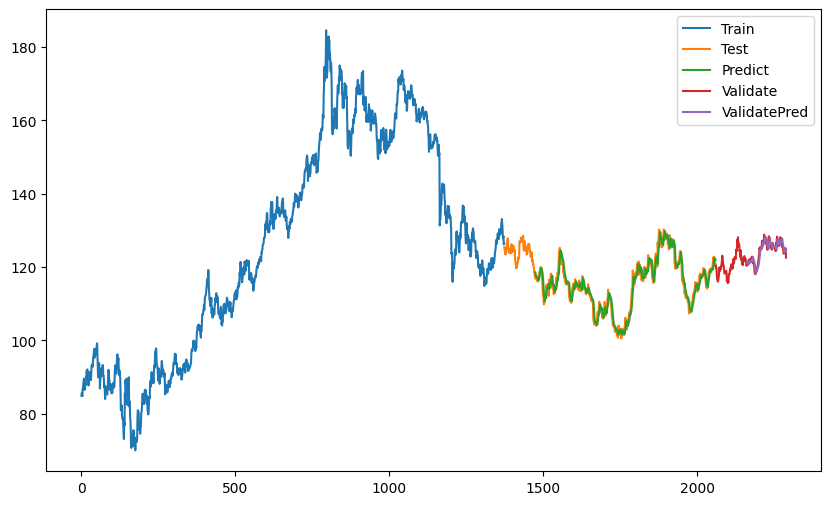

In [ ]:
visualize(y_pred_gru_test, y_pred_gru_val)

# BNN - tf

## Split data 8:1:1


In [ ]:
train_size, test_size, val_size, train_data, test_data, val_data = split_data(0.8, 0.1)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the hyperparameters
input_dim = X_train.shape[1]  # Dimension of input features
output_dim = 1  # Dimension of output (predicted value)
hidden_units = 64  # Number of hidden units
learning_rate = 0.001
num_epochs = 500

# Apply Min-Max scaling to the time series data

# Convert the scaled data to tensors
targets = torch.tensor(y_train).view(-1, 1).to(torch.float32)
time_series = torch.tensor(X_train).to(torch.float32)

# Create a DataLoader for batching and shuffling the data
dataset = TensorDataset(time_series, targets)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Initialize the BNN model
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=input_dim, out_features=hidden_units),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=hidden_units, out_features=output_dim)
)

# Define the loss function
loss_fn = nn.MSELoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
lowest_loss = 1

# Training loop
for epoch in range(num_epochs):
    for batch_inputs, batch_targets in dataloader:
        # Forward pass
        predictions = model(batch_inputs)

        # Compute the loss
        loss = loss_fn(predictions, batch_targets)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if loss < lowest_loss:
          torch.save(model.state_dict(), '/content/best-model-parameters.pt')

    # Print the loss after each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")


Epoch 1/500, Loss: 0.004533593077212572
Epoch 2/500, Loss: 0.0003865719772875309
Epoch 3/500, Loss: 0.006066931877285242
Epoch 4/500, Loss: 0.053492527455091476
Epoch 5/500, Loss: 0.07965236157178879
Epoch 6/500, Loss: 0.06229005753993988
Epoch 7/500, Loss: 0.08061125129461288
Epoch 8/500, Loss: 0.15610109269618988
Epoch 9/500, Loss: 0.00697341887280345
Epoch 10/500, Loss: 0.04807806387543678
Epoch 11/500, Loss: 0.04915899410843849
Epoch 12/500, Loss: 0.012301606126129627
Epoch 13/500, Loss: 0.008522776886820793
Epoch 14/500, Loss: 0.021797239780426025
Epoch 15/500, Loss: 0.010089282877743244
Epoch 16/500, Loss: 0.017659293487668037
Epoch 17/500, Loss: 0.02939426153898239
Epoch 18/500, Loss: 0.028573205694556236
Epoch 19/500, Loss: 0.09027472138404846
Epoch 20/500, Loss: 0.13606737554073334
Epoch 21/500, Loss: 0.013143743388354778
Epoch 22/500, Loss: 0.004941763821989298
Epoch 23/500, Loss: 0.004054904915392399
Epoch 24/500, Loss: 0.004956687800586224
Epoch 25/500, Loss: 0.002697189338

In [ ]:
print(model)

Sequential(
  (0): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=64, bias=True)
  (1): ReLU()
  (2): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=64, out_features=1, bias=True)
)


In [ ]:
best_model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=input_dim, out_features=hidden_units),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=hidden_units, out_features=output_dim)
)

best_model.load_state_dict(torch.load('/content/best-model-parameters.pt'))
val = torch.tensor(X_val).to(torch.float32)
y_pred_bnn_val = best_model(val)
test = torch.tensor(X_test).to(torch.float32)
y_pred_bnn_test = best_model(test)

In [ ]:
evaluation(scaler.inverse_transform(y_pred_bnn_test.detach().numpy()), scaler.inverse_transform(y_test.reshape(-1,1)))

MSE = 5.637354751328138
RMSE = 2.3743114267779064
MAE = 2.0208572574386596
R2_Score = 0.6564792134762794
MAPE = 0.017654053890739922


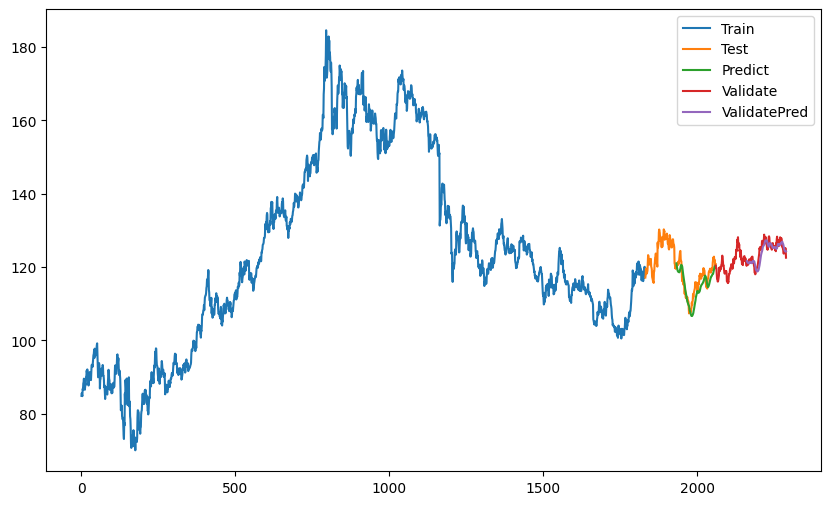

In [ ]:
plt.figure(figsize=(10, 6))

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(np.array(train_data).reshape(-1,1)))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(np.array(test_data).reshape(-1,1)))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(y_pred_bnn_test.detach().numpy()))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(np.array(val_data).reshape(-1,1)))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index, scaler.inverse_transform(y_pred_bnn_val.detach().numpy()))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

## Split data 7:2:1


In [ ]:
train_size, test_size, val_size, train_data, test_data, val_data = split_data(0.7, 0.2)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the hyperparameters
input_dim = X_train.shape[1]  # Dimension of input features
output_dim = 1  # Dimension of output (predicted value)
hidden_units = 64  # Number of hidden units
learning_rate = 0.001
num_epochs = 500

# Apply Min-Max scaling to the time series data

# Convert the scaled data to tensors
targets = torch.tensor(y_train).view(-1, 1).to(torch.float32)
time_series = torch.tensor(X_train).to(torch.float32)

# Create a DataLoader for batching and shuffling the data
dataset = TensorDataset(time_series, targets)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Initialize the BNN model
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=input_dim, out_features=hidden_units),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=hidden_units, out_features=output_dim)
)

# Define the loss function
loss_fn = nn.MSELoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
lowest_loss = 1

# Training loop
for epoch in range(num_epochs):
    for batch_inputs, batch_targets in dataloader:
        # Forward pass
        predictions = model(batch_inputs)

        # Compute the loss
        loss = loss_fn(predictions, batch_targets)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if loss < lowest_loss:
          torch.save(model.state_dict(), '/content/best-model-parameters.pt')

    # Print the loss after each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")


Epoch 1/500, Loss: 0.01839977502822876
Epoch 2/500, Loss: 0.08465586602687836
Epoch 3/500, Loss: 0.10578861832618713
Epoch 4/500, Loss: 0.10475233942270279
Epoch 5/500, Loss: 0.07920113950967789
Epoch 6/500, Loss: 0.07952988147735596
Epoch 7/500, Loss: 0.04365815967321396
Epoch 8/500, Loss: 0.1084287017583847
Epoch 9/500, Loss: 0.019607944414019585
Epoch 10/500, Loss: 0.3777674734592438
Epoch 11/500, Loss: 0.07104305177927017
Epoch 12/500, Loss: 0.004556579049676657
Epoch 13/500, Loss: 0.02540116384625435
Epoch 14/500, Loss: 0.026305649429559708
Epoch 15/500, Loss: 0.07346060872077942
Epoch 16/500, Loss: 0.006983928848057985
Epoch 17/500, Loss: 0.052743326872587204
Epoch 18/500, Loss: 0.11200530081987381
Epoch 19/500, Loss: 0.015387904830276966
Epoch 20/500, Loss: 0.012295948341488838
Epoch 21/500, Loss: 0.01486906222999096
Epoch 22/500, Loss: 0.08119205385446548
Epoch 23/500, Loss: 0.024611376225948334
Epoch 24/500, Loss: 0.1430794596672058
Epoch 25/500, Loss: 0.06653062254190445
Epoc

In [ ]:
best_model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=input_dim, out_features=hidden_units),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=hidden_units, out_features=output_dim)
)

best_model.load_state_dict(torch.load('/content/best-model-parameters.pt'))
val = torch.tensor(X_val).to(torch.float32)
y_pred_bnn_val = best_model(val)
test = torch.tensor(X_test).to(torch.float32)
y_pred_bnn_test = best_model(test)

In [ ]:
evaluation(scaler.inverse_transform(y_pred_bnn_test.detach().numpy()), scaler.inverse_transform(y_test.reshape(-1,1)))

MSE = 6.658734004956522
RMSE = 2.5804522868978848
MAE = 2.065238527371105
R2_Score = 0.8891034452516356
MAPE = 0.017596948308207936


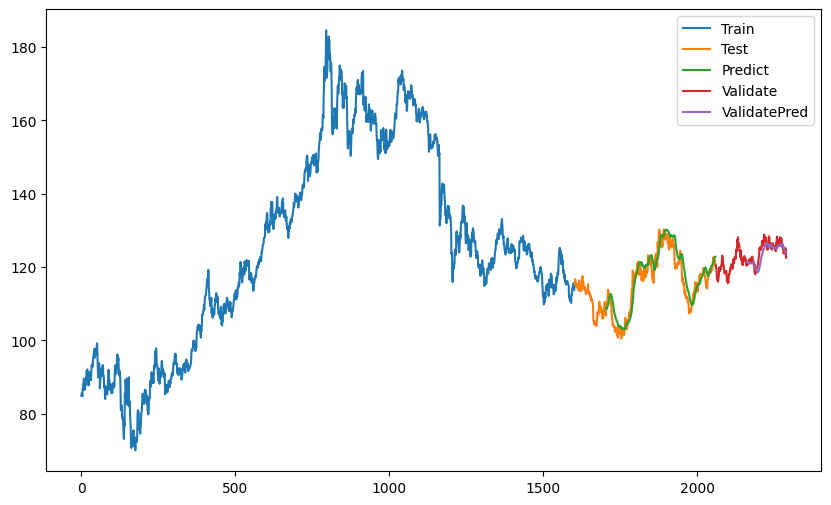

In [ ]:
plt.figure(figsize=(10, 6))

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(np.array(train_data).reshape(-1,1)))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(np.array(test_data).reshape(-1,1)))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(y_pred_bnn_test.detach().numpy()))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(np.array(val_data).reshape(-1,1)))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index, scaler.inverse_transform(y_pred_bnn_val.detach().numpy()))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

## Split data 6:3:1


In [ ]:
train_size, test_size, val_size, train_data, test_data, val_data = split_data(0.6, 0.3)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, y_val = create_dataset(val_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import MinMaxScaler

# Set random seed for reproducibility
torch.manual_seed(42)

# Define the hyperparameters
input_dim = X_train.shape[1]  # Dimension of input features
output_dim = 1  # Dimension of output (predicted value)
hidden_units = 64  # Number of hidden units
learning_rate = 0.001
num_epochs = 500

# Apply Min-Max scaling to the time series data

# Convert the scaled data to tensors
targets = torch.tensor(y_train).view(-1, 1).to(torch.float32)
time_series = torch.tensor(X_train).to(torch.float32)

# Create a DataLoader for batching and shuffling the data
dataset = TensorDataset(time_series, targets)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Initialize the BNN model
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=input_dim, out_features=hidden_units),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=hidden_units, out_features=output_dim)
)

# Define the loss function
loss_fn = nn.MSELoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
lowest_loss = 1

# Training loop
for epoch in range(num_epochs):
    for batch_inputs, batch_targets in dataloader:
        # Forward pass
        predictions = model(batch_inputs)

        # Compute the loss
        loss = loss_fn(predictions, batch_targets)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if loss < lowest_loss:
          torch.save(model.state_dict(), '/content/best-model-parameters.pt')

    # Print the loss after each epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")


Epoch 1/500, Loss: 0.004527249839156866
Epoch 2/500, Loss: 0.029889585450291634
Epoch 3/500, Loss: 0.02683843858540058
Epoch 4/500, Loss: 0.008016780018806458
Epoch 5/500, Loss: 0.03277784213423729
Epoch 6/500, Loss: 0.0947839543223381
Epoch 7/500, Loss: 0.026852387934923172
Epoch 8/500, Loss: 0.07850515842437744
Epoch 9/500, Loss: 0.14371073246002197
Epoch 10/500, Loss: 0.03174157813191414
Epoch 11/500, Loss: 0.08873967826366425
Epoch 12/500, Loss: 0.0397602804005146
Epoch 13/500, Loss: 0.014649437740445137
Epoch 14/500, Loss: 0.03269440680742264
Epoch 15/500, Loss: 0.058338142931461334
Epoch 16/500, Loss: 0.059231627732515335
Epoch 17/500, Loss: 0.010290668345987797
Epoch 18/500, Loss: 0.011625017039477825
Epoch 19/500, Loss: 0.05510202422738075
Epoch 20/500, Loss: 0.04281587898731232
Epoch 21/500, Loss: 0.009005848318338394
Epoch 22/500, Loss: 0.07645449042320251
Epoch 23/500, Loss: 0.3378402590751648
Epoch 24/500, Loss: 0.21392998099327087
Epoch 25/500, Loss: 0.13307206332683563
Ep

In [ ]:
best_model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=input_dim, out_features=hidden_units),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=hidden_units, out_features=output_dim)
)

best_model.load_state_dict(torch.load('/content/best-model-parameters.pt'))
val = torch.tensor(X_val).to(torch.float32)
y_pred_bnn_val = best_model(val)
test = torch.tensor(X_test).to(torch.float32)
y_pred_bnn_test = best_model(test)

In [ ]:
evaluation(scaler.inverse_transform(y_pred_bnn_test.detach().numpy()), scaler.inverse_transform(y_test.reshape(-1,1)))

MSE = 7.011264887183001
RMSE = 2.64787931884801
MAE = 2.100713665900637
R2_Score = 0.8221476696284948
MAPE = 0.018116692902636223


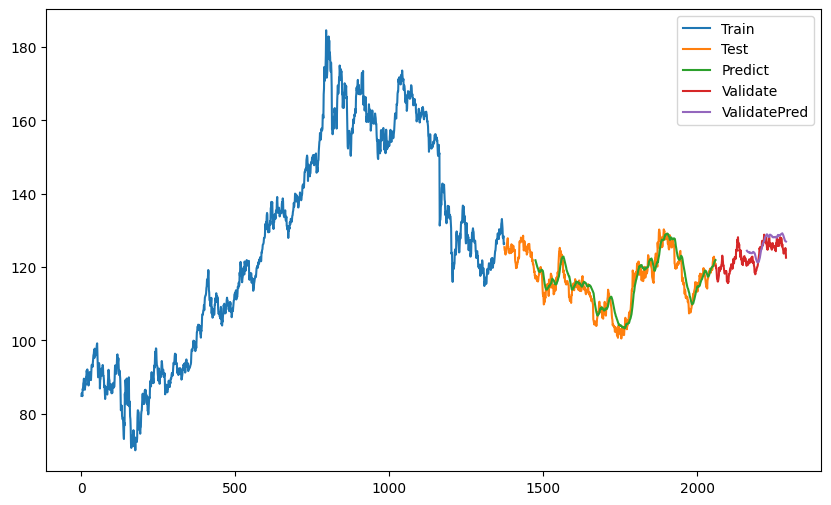

In [ ]:
plt.figure(figsize=(10, 6))

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(np.array(train_data).reshape(-1,1)))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(np.array(test_data).reshape(-1,1)))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(y_pred_bnn_test.detach().numpy()))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(np.array(val_data).reshape(-1,1)))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index, scaler.inverse_transform(y_pred_bnn_val.detach().numpy()))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()

# HMM

## Split data 8:2

In [ ]:
df['Date'] = pd.to_datetime(df.Date)
df2 = df[['Date', 'GLD']]
df2["Date"] = pd.to_datetime(df2["Date"])

train_size = int(0.8 * len(df2))
test_size = int(0.2 * len(df2))
val_size = len(df2) - train_size - test_size

train_data = df2[:train_size]
test_data = df2[train_size:train_size+test_size].reset_index(drop=True)
val_data = df2[train_size+test_size:].reset_index(drop=True)

<ipython-input-29-b3d73a735639>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



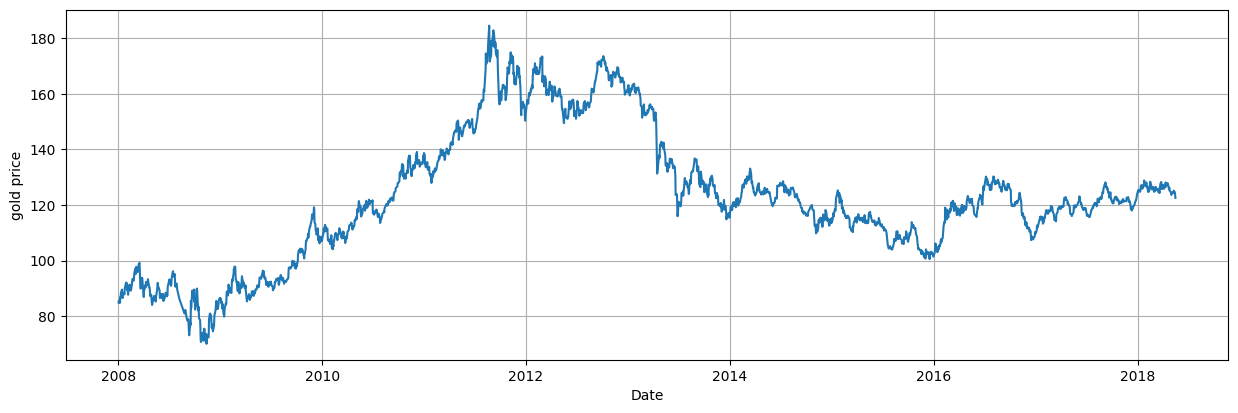

In [ ]:
# Plot the daily gold prices as well as the daily change.
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(df2["Date"], df2["GLD"])
plt.xlabel("Date")
plt.ylabel("gold price")
plt.grid(True)

In [ ]:
from hmmlearn import hmm

# Determine the daily change in gold price.
train_data["gold_price_change"] = train_data["GLD"].diff()
train_data["gold_price_change"] = train_data["gold_price_change"].fillna(0)

# # Restrict the data to later than 2008 Jan 01.
# df = df[df["Date"] >= pd.to_datetime("2008-01-01")]

X = train_data[["gold_price_change"]].values

# Use the daily change in gold price as the observed measurements X.

# Build the HMM model and fit to the gold price change data.
model = hmm.GaussianHMM(n_components = 10, covariance_type = "full", random_state = 42)
model.fit(X)
# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)

<ipython-input-31-3b358bcbdfb8>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-31-3b358bcbdfb8>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'gold price')

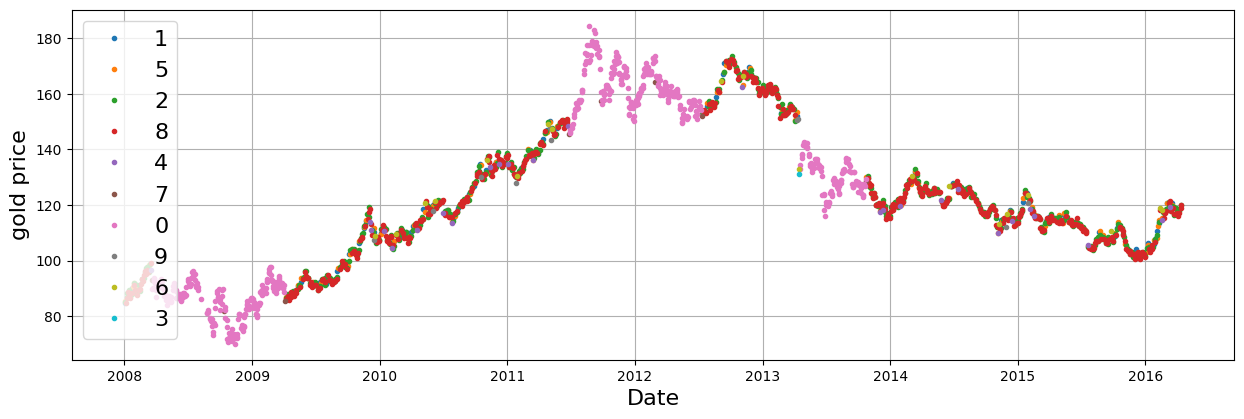

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (Z == i)
    x = train_data["Date"].iloc[want]
    y = train_data["GLD"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("Date", fontsize=16)
plt.ylabel("gold price", fontsize=16)

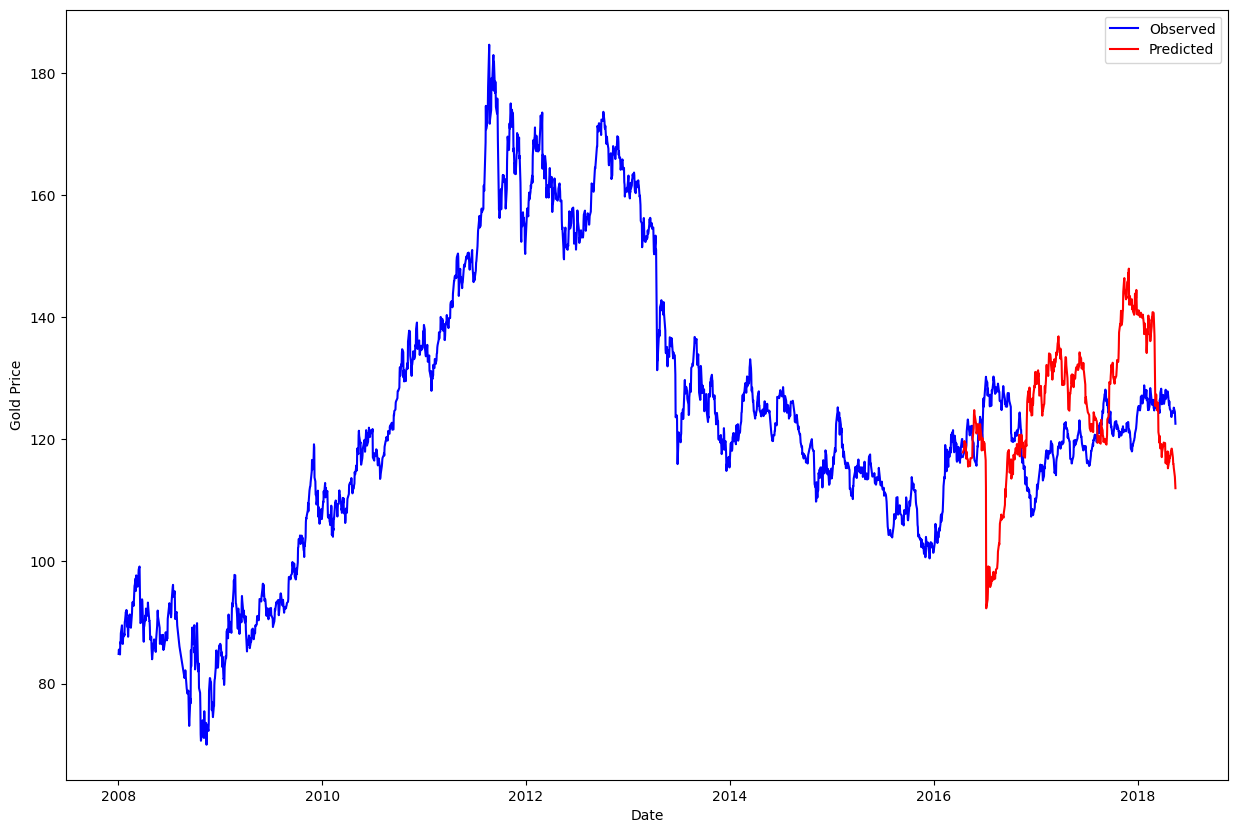

In [ ]:
n_steps = len(test_data)


X_pred, Z_pred = model.sample(n_samples=n_steps)

# Access the predicted gold price change
predicted_price_change = X_pred[:, 0]

# Assuming the last observed date in the df is "last_date"
last_date = train_data["Date"].iloc[-1]

# Use the last observed gold price as the initial price for predictions
initial_price = train_data["GLD"].iloc[-1]

# Calculate the predicted gold prices
predicted_prices = initial_price + np.cumsum(predicted_price_change)

# Plot the predicted gold prices
plt.figure(figsize=(15, 10))
plt.plot(train_data["Date"], train_data["GLD"], label="Observed", color="blue")
plt.plot(test_data["Date"], test_data["GLD"], color="blue")
plt.plot(test_data["Date"], predicted_prices, label="Predicted", color="red")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.show()

In [ ]:
evaluation(test_data['GLD'], predicted_prices)

MSE = 197.35079076395155
RMSE = 14.04815969313958
MAE = 11.740847377972251
R2_Score = -7.421816147956985
MAPE = 0.09687682278003382


In [ ]:
print(model)

GaussianHMM(covariance_type='full', n_components=10, random_state=42)


## Split data 7:3

In [ ]:
df['Date'] = pd.to_datetime(df.Date)
df2 = df[['Date', 'GLD']]
df2["Date"] = pd.to_datetime(df2["Date"])

train_size = int(0.7 * len(df2))
test_size = int(0.3 * len(df2))
val_size = len(df2) - train_size - test_size

train_data = df2[:train_size]
test_data = df2[train_size:train_size+test_size].reset_index(drop=True)
val_data = df2[train_size+test_size:].reset_index(drop=True)

<ipython-input-276-f1e36789488a>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



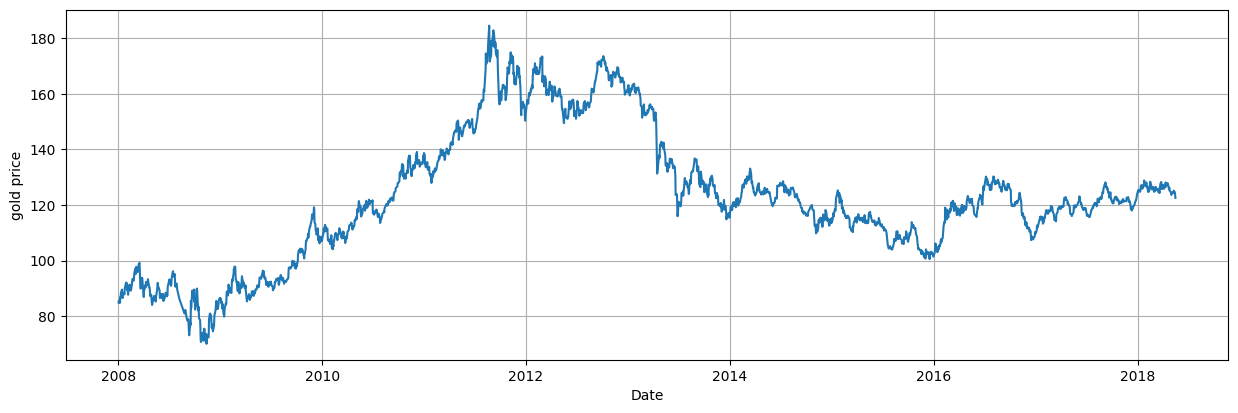

In [ ]:
# Plot the daily gold prices as well as the daily change.
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(df2["Date"], df2["GLD"])
plt.xlabel("Date")
plt.ylabel("gold price")
plt.grid(True)

In [ ]:
from hmmlearn import hmm

# Determine the daily change in gold price.
train_data["gold_price_change"] = train_data["GLD"].diff()
train_data["gold_price_change"] = train_data["gold_price_change"].fillna(0)

# # Restrict the data to later than 2008 Jan 01.
# df = df[df["Date"] >= pd.to_datetime("2008-01-01")]

X = train_data[["gold_price_change"]].values

# Use the daily change in gold price as the observed measurements X.

# Build the HMM model and fit to the gold price change data.
model = hmm.GaussianHMM(n_components = 10, covariance_type = "full", random_state = 42)
model.fit(X)
# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)

<ipython-input-278-3b358bcbdfb8>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-278-3b358bcbdfb8>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'gold price')

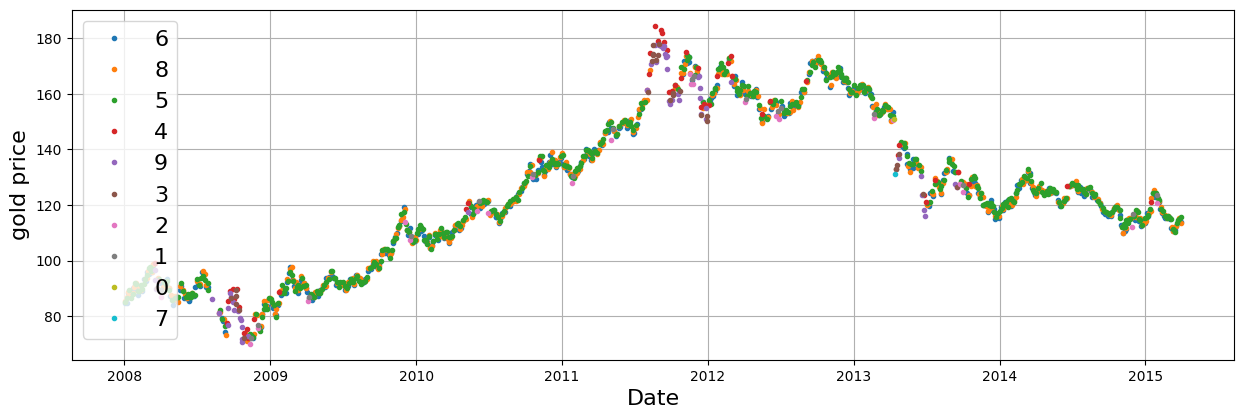

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (Z == i)
    x = train_data["Date"].iloc[want]
    y = train_data["GLD"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("Date", fontsize=16)
plt.ylabel("gold price", fontsize=16)

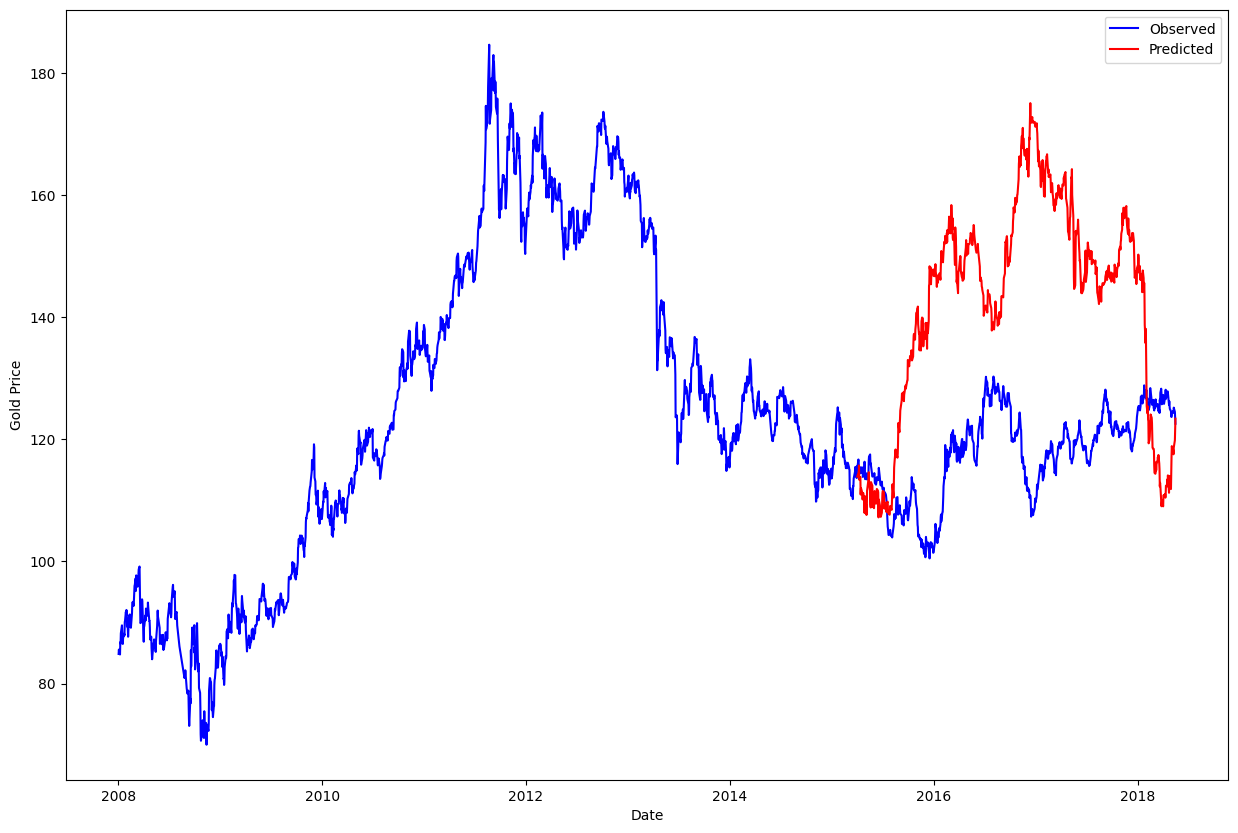

In [ ]:
n_steps = len(test_data)


X_pred, Z_pred = model.sample(n_samples=n_steps)

# Access the predicted gold price change
predicted_price_change = X_pred[:, 0]

# Assuming the last observed date in the df is "last_date"
last_date = train_data["Date"].iloc[-1]

# Use the last observed gold price as the initial price for predictions
initial_price = train_data["GLD"].iloc[-1]

# Calculate the predicted gold prices
predicted_prices = initial_price + np.cumsum(predicted_price_change)

# Plot the predicted gold prices
plt.figure(figsize=(15, 10))
plt.plot(train_data["Date"], train_data["GLD"], label="Observed", color="blue")
plt.plot(test_data["Date"], test_data["GLD"], color="blue")
plt.plot(test_data["Date"], predicted_prices, label="Predicted", color="red")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.show()

In [ ]:
evaluation(test_data['GLD'], predicted_prices)

MSE = 976.9381914031484
RMSE = 31.256010484435603
MAE = 27.26147596214096
R2_Score = -17.611417660488737
MAPE = 0.2350423401248227


## Split data 6:4

In [ ]:
df['Date'] = pd.to_datetime(df.Date)
df2 = df[['Date', 'GLD']]
df2["Date"] = pd.to_datetime(df2["Date"])

train_size = int(0.6 * len(df2))
test_size = int(0.4 * len(df2))
val_size = len(df2) - train_size - test_size

train_data = df2[:train_size]
test_data = df2[train_size:train_size+test_size].reset_index(drop=True)
val_data = df2[train_size+test_size:].reset_index(drop=True)

<ipython-input-282-7dd34aec651b>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



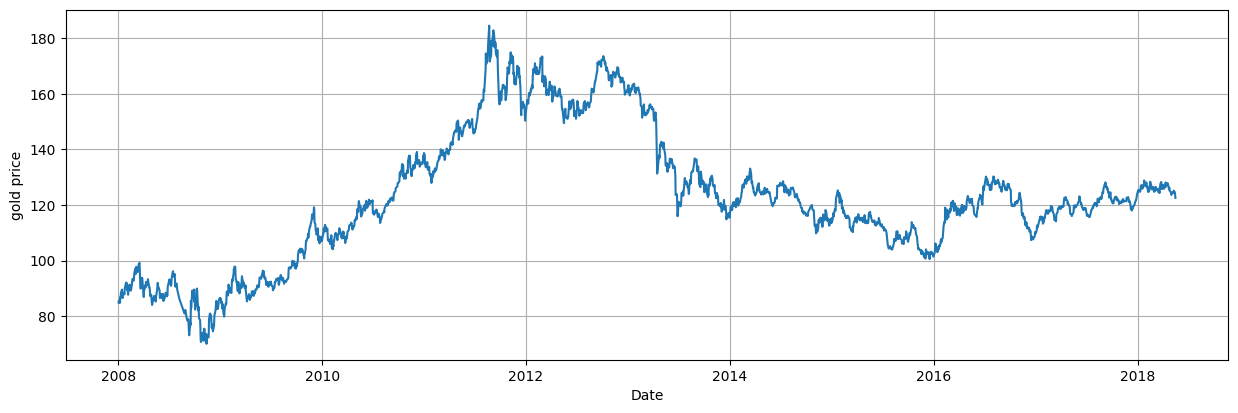

In [ ]:
# Plot the daily gold prices as well as the daily change.
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(df2["Date"], df2["GLD"])
plt.xlabel("Date")
plt.ylabel("gold price")
plt.grid(True)

In [ ]:
from hmmlearn import hmm

# Determine the daily change in gold price.
train_data["gold_price_change"] = train_data["GLD"].diff()
train_data["gold_price_change"] = train_data["gold_price_change"].fillna(0)

# # Restrict the data to later than 2008 Jan 01.
# df = df[df["Date"] >= pd.to_datetime("2008-01-01")]

X = train_data[["gold_price_change"]].values

# Use the daily change in gold price as the observed measurements X.

# Build the HMM model and fit to the gold price change data.
model = hmm.GaussianHMM(n_components = 10, covariance_type = "full", random_state = 42)
model.fit(X)
# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)

<ipython-input-284-3b358bcbdfb8>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-284-3b358bcbdfb8>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Text(0, 0.5, 'gold price')

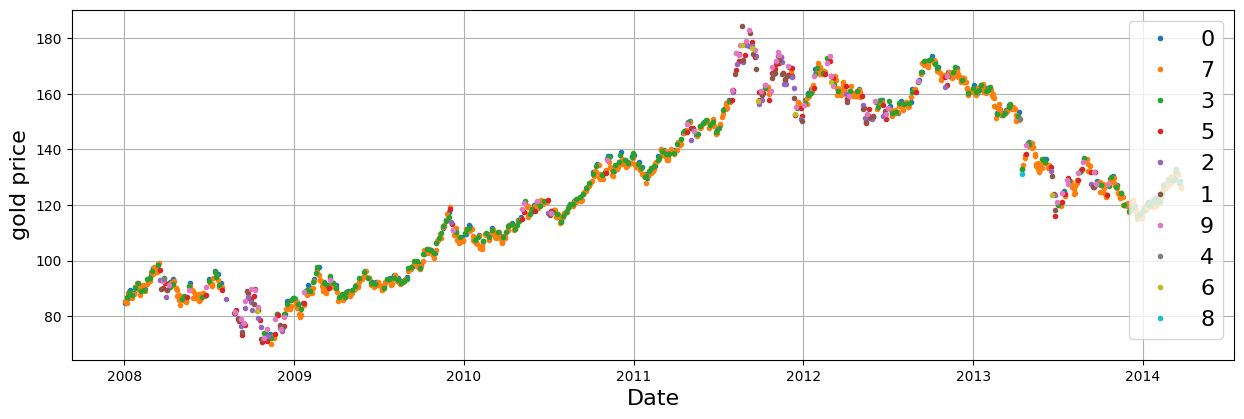

In [ ]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (Z == i)
    x = train_data["Date"].iloc[want]
    y = train_data["GLD"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("Date", fontsize=16)
plt.ylabel("gold price", fontsize=16)

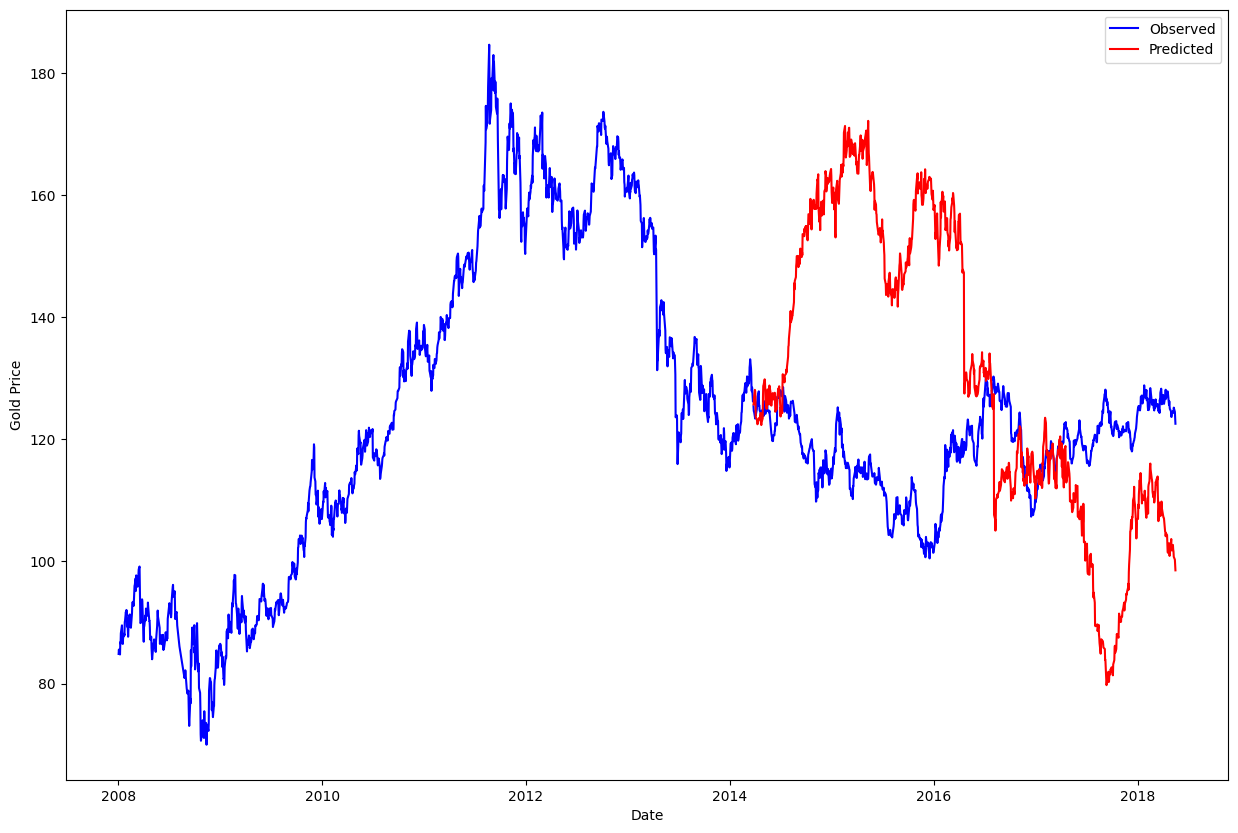

In [ ]:
n_steps = len(test_data)


X_pred, Z_pred = model.sample(n_samples=n_steps)

# Access the predicted gold price change
predicted_price_change = X_pred[:, 0]

# Assuming the last observed date in the df is "last_date"
last_date = train_data["Date"].iloc[-1]

# Use the last observed gold price as the initial price for predictions
initial_price = train_data["GLD"].iloc[-1]

# Calculate the predicted gold prices
predicted_prices = initial_price + np.cumsum(predicted_price_change)

# Plot the predicted gold prices
plt.figure(figsize=(15, 10))
plt.plot(train_data["Date"], train_data["GLD"], label="Observed", color="blue")
plt.plot(test_data["Date"], test_data["GLD"], color="blue")
plt.plot(test_data["Date"], predicted_prices, label="Predicted", color="red")
plt.xlabel("Date")
plt.ylabel("Gold Price")
plt.legend()
plt.show()

In [ ]:
evaluation(test_data['GLD'], predicted_prices)

MSE = 1009.6038434947741
RMSE = 31.774263854490382
MAE = 25.712267271447647
R2_Score = -20.782143744676137
MAPE = 0.2239030847871119
